In [61]:
from xml_tools import get_abstract_contents
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
import pandas as pd


In [2]:
import glob
from os import path



In [4]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [5]:
xmls = glob.glob('../articles_from_tatiana/batch3_header_xml/*.xml')

xmls[:10]

['../articles_from_tatiana/batch3_header_xml/Grieger 2003.xml',
 '../articles_from_tatiana/batch3_header_xml/Xu et al 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Cao et al 2019.xml',
 '../articles_from_tatiana/batch3_header_xml/Mantin et al 2014.xml',
 '../articles_from_tatiana/batch3_header_xml/Li 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Shen et al 2019.xml',
 '../articles_from_tatiana/batch3_header_xml/Avinadav et al 2015b.xml',
 '../articles_from_tatiana/batch3_header_xml/Hua et al 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Zhen et al 2020.xml',
 '../articles_from_tatiana/batch3_header_xml/Avinadav et al 2020b.xml']

In [6]:
article_abstract_dict = {path.basename(x).split('.')[0]: get_abstract_contents(x) for x in xmls}

In [7]:
print([len(v.split()) for v in article_abstract_dict.values()])

[117, 100, 245, 250, 96, 231, 124, 193, 257, 166, 340, 194, 169, 0, 209, 212, 248, 307, 90, 246, 254, 130, 200, 167, 254, 241, 224, 96, 247, 167, 217, 158, 94, 153, 141, 229, 184, 172, 244, 222, 189, 225, 220, 251, 161, 200, 242, 249, 246, 79, 199, 180, 213, 188, 281, 160, 148, 201, 185]


In [31]:
def spacy_tokenizer(document, chunks=True):
    tokens = nlp(document)
    tokens = [token.lemma_ for token in (tokens.noun_chunks if chunks else tokens)  if (
        (chunks or token.is_stop == False) and 
        (chunks or token.is_punct == False) and 
        token.lemma_.strip()!= ''
    )]
    return tokens

In [44]:
def spacy_clean_tokenizer(document, chunks=True):
    tokens = nlp(document)
    tokens = [token.lemma_ for token in (tokens.noun_chunks if chunks else tokens)  if (
        (chunks or token.is_stop == False) and 
        (chunks or token.is_punct == False) and 
        token.lemma_.strip()!= ''
    )]
    tokens = [ ' '.join([tk.lemma_ for tk in nlp(token) if not (tk.is_stop or tk.is_punct)]) for token in tokens]
    tokens = [tk for tk in tokens if len(tk)]
    return tokens

In [49]:
d = iter(article_abstract_dict.values())
n = nlp(next(d))

In [50]:
n

These days, Internet-based electronic marketplaces (EMs) are getting more and more popular. They emerge in different industries, supporting the exchange of goods and services of different kinds, with and for different types of actors, and are following different architectural principles. Most observers have assumed that EM would come to dominate the e-business landscape. Once you look beyond the publicity, however, you quickly see that most EMs are struggling. The supply chain dimension of an EM is largely neglected and poorly managed, while basic logistics operation is currently hampering turnover and revenues. The Paper at hand examines, based on a critical literature review, the actual EM discussion and calls for more supply chain management research within this field.

In [46]:
spacy_clean_tokenizer(d)

['internet base electronic marketplace',
 'em',
 'different industry',
 'exchange',
 'good',
 'service',
 'different kind',
 'different type',
 'actor',
 'different architectural principle',
 'observer',
 'em',
 'e business landscape',
 'publicity',
 'em',
 'supply chain dimension',
 'em',
 'basic logistic operation',
 'turnover',
 'revenue',
 'paper',
 'hand examine',
 'critical literature review',
 'actual EM discussion',
 'supply chain management research',
 'field']

In [51]:
Counter(spacy_clean_tokenizer(next(d))).most_common()

[('supply chain', 3),
 ('platform power', 3),
 ('manufacturer', 2),
 ('platform', 2),
 ('paper', 1),
 ('coordination problem', 1),
 ('retailer', 1),
 ('product', 1),
 ('offline channel', 1),
 ('online platform', 1),
 ('ability', 1),
 ('market share', 1),
 ('wholesale price cost share contract', 1),
 ('cost share contract', 1),
 ('delivery time sensitivity', 1),
 ('result', 1)]

In [52]:
Counter(spacy_clean_tokenizer(next(d))).most_common()

[('platform', 7),
 ('self run store', 4),
 ('b2c platform', 3),
 ('party store', 3),
 ('GC', 3),
 ('cc', 3),
 ('consumer', 2),
 ('store', 2),
 ('product', 2),
 ('trade effort', 2),
 ('model', 2),
 ('trade program', 1),
 ('sale', 1),
 ('dual format retailing model', 1),
 ('trade program framework', 1),
 ('optimal trade rebate', 1),
 ('rebate', 1),
 ('gift card', 1),
 ('cash coupon', 1),
 ('market', 1),
 ('decision challenge', 1),
 ('optimal tradein strategy', 1),
 ('theoretical model', 1),
 ('effort', 1),
 ('i.e. model', 1),
 ('GC payment', 1),
 ('cc payment', 1),
 ('consideration', 1),
 ('interesting finding', 1),
 ('insight', 1),
 ('high quality low selling price', 1),
 ('competition', 1),
 ('trade', 1),
 ('low trade rebate', 1),
 ('high profit', 1),
 ('counterintuitive finding', 1),
 ('high gift card redemption rate', 1)]

In [53]:
Counter(spacy_clean_tokenizer(next(d))).most_common()

[('manufacturer', 7),
 ('retailer', 5),
 ('3p marketplace', 5),
 ('outside option', 3),
 ('sale', 3),
 ('profit', 2),
 ('3p seller', 2),
 ('competition', 2),
 ('r etailer', 1),
 ('dual format model', 1),
 ('addition', 1),
 ('traditional merchant', 1),
 ('good', 1),
 ('platform', 1),
 ('party', 1),
 ('3p', 1),
 ('seller', 1),
 ('customer', 1),
 ('strategic rationale', 1),
 ('analysis', 1),
 ('insight', 1),
 ('grow prevalence', 1),
 ('active 3p marketplace', 1),
 ('bargaining position', 1),
 ('negotiation', 1),
 ('increase prevalence', 1),
 ('marketplace', 1),
 ('hand', 1),
 ('retailer outside option', 1),
 ('action', 1),
 ('compete product', 1),
 ('good strategy', 1),
 ('term', 1),
 ('contract', 1),
 ('powerful retailer', 1),
 ('fee', 1),
 ('decrease', 1),
 ('increase', 1),
 ('value', 1),
 ('presence', 1),
 ('consumer', 1),
 ('benefit', 1)]

In [56]:
tfidf_vectorizer = TfidfVectorizer(input = 'content', tokenizer = spacy_clean_tokenizer)

In [59]:
result = tfidf_vectorizer.fit_transform(iter(article_abstract_dict.values()))
result

<59x1474 sparse matrix of type '<class 'numpy.float64'>'
	with 2108 stored elements in Compressed Sparse Row format>

In [58]:
tfidf_vectorizer

TfidfVectorizer(tokenizer=<function spacy_clean_tokenizer at 0x7f307251aee0>)

In [136]:
kmeans = KMeans(n_clusters=3,random_state=1015).fit(result)

In [137]:
kmeans.cluster_centers_.shape

(3, 1474)

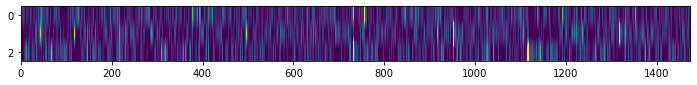

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.imshow(kmeans.cluster_centers_,aspect=40,vmax=0.03)

In [169]:
cc = kmeans.cluster_centers_
k = []
for i in range(3):
    k.append(sorted(zip(cc[i,:], tfidf_vectorizer.get_feature_names()),reverse=True)[:12])

k

[[(0.05451822982656782, 'e tailer'),
  (0.052085057483321213, 'marketplace'),
  (0.05076172555424087, 'manufacturer'),
  (0.04525019175914161, 'tailer'),
  (0.04215588910000898, 'e'),
  (0.040610115292626814, 'sale'),
  (0.035693111947036164, 'marketplace channel'),
  (0.03357962391753457, 'e marketplace'),
  (0.030599610810264317, 'em'),
  (0.02977364204468048, 'o2o platform'),
  (0.02697580619792087, 'paper'),
  (0.026130840267553263, 'online marketplace')],
 [(0.1589447220669641, 'platform'),
  (0.1208346902411218, 'supplier'),
  (0.05856935973361438, 'firm'),
  (0.05526385712739338, 'agency contract'),
  (0.05043663591193135, 'blockchain'),
  (0.04024898792830568, 'supply chain'),
  (0.03633763372071041, 'p2p marketplace'),
  (0.03607462588227508, 'consumer'),
  (0.03374996575303633, 'logistic service'),
  (0.03374196289781138, 'contract'),
  (0.03321105724324788, 'service provider'),
  (0.03185529771142179, 'ddm')],
 [(0.1428603824464179, 'retailer'),
  (0.13197477839883787, 'manu

In [174]:
lst = [',\n'.join(sorted([b[1] for b in a])) for a in k]
for l in lst:
    print(l)
    print(';')

e,
e marketplace,
e tailer,
em,
manufacturer,
marketplace,
marketplace channel,
o2o platform,
online marketplace,
paper,
sale,
tailer
;
agency contract,
blockchain,
consumer,
contract,
ddm,
firm,
logistic service,
p2p marketplace,
platform,
service provider,
supplier,
supply chain
;
app,
case,
demand,
developer,
m&a,
manufacturer,
platform power,
product,
retailer,
revenue sharing,
store,
trading market
;


In [140]:
cluster_dict = dict(zip(article_abstract_dict.keys(), kmeans.labels_))

In [141]:
inverse_clusters = {}
for k, v in cluster_dict.items():
    inverse_clusters[v] = inverse_clusters.get(v,[])+[k]

for k in inverse_clusters.keys():
    inverse_clusters[k] = sorted(inverse_clusters[k])

In [142]:
from itertools import product
def compare_sets(d1, d2):
    for k1, k2, in product(d1.keys(), d2.keys()):
        v1,v2 = d1[k1], d2[k2]
        joint = len(set(v1) & set(v2))
        if joint and len(v2) > 1:
            yield k1, k2, len(v1), len(v2), joint
            
def dict_intersections(d1,d2):
    for k1, k2, in product(d1.keys(), d2.keys()):
        v1,v2 = d1[k1], d2[k2]
        joint = set(v1) & set(v2)
        yield (k1,k2), joint

In [143]:
articles_from_keywords = {0: ['Grieger 2003',
  'Li 2020',
  'Avinadav et al 2015b',
  'Avinadav et al 2020b',
  'Alaei et al 2020',
  'Yan et al 2018',
  'Liu et al 2020',
  'Avinadav et al 2020',
  'Avinadav et al 2015a',
  'Chernonog 2020',
  'Choi et al 2004',
  'Yan et al 2019',
  'Avinadav et al 2017',
  'Zhang and Zhang 2020',
  'Avinadav et al 2019',
  'Shen et al 2019b',
  'Zhao and Bisi 2010',
  'de Matta et al 2017',
  'Yu and Zhang 2017',
  'De Giovanni 2020'],
 1: ['Xu et al 2020',
  'Mantin et al 2014',
  'Shen et al 2019',
  'Wang et al 2020',
  'Schlosser and Boissier 2018',
  'Yenipazarli 2020',
  'He et al 2021',
  'Chen et al 2019',
  'Zennyo 2020',
  'Li et al 2019',
  'Cao et al 2020',
  'Shen et al 2020',
  'Zhou et al 2019',
  'Renna 2010',
  'Li et al 2016',
  'Qin et al 2020b',
  'Abhishek et al 2016',
  'Hagiu and Wright 2020',
  'Yu et al 2020',
  'Lin et al 2020',
  'Qin et al 2020',
  'Luo et al 2020',
  'Ryan et al 2012'],
 2: ['Cao et al 2019',
  'Hua et al 2020',
  'Zhen et al 2020',
  'Cai and Lo 2020',
  'Wang et al 2019',
  'He et al 2020',
  'Lu et al 2018',
  'Xu et al 2018',
  'Jiang et al 2017',
  'Li et al 2020',
  'Chen et al 2020',
  'Guo et al 2020'],
#  -1: ['Sun et al 2020',
#   'Zhang and Zhang 2019',
#   'Geng et al 2018',
#   'Tian et al 2018']
                         }

In [144]:
inverse_clusters

{0: ['Abhishek et al 2016',
  'Alaei et al 2020',
  'Cai and Lo 2020',
  'Chen et al 2019',
  'Chen et al 2020',
  'Choi et al 2004',
  'Grieger 2003',
  'Hagiu and Wright 2020',
  'He et al 2020',
  'Li et al 2016',
  'Li et al 2019',
  'Lu et al 2018',
  'Luo et al 2020',
  'Renna 2010',
  'Schlosser and Boissier 2018',
  'Xu et al 2018',
  'Yan et al 2018',
  'Yan et al 2019',
  'Yenipazarli 2020',
  'Yu and Zhang 2017',
  'Zhang and Zhang 2019',
  'de Matta et al 2017'],
 2: ['Avinadav et al 2015a',
  'Avinadav et al 2015b',
  'Avinadav et al 2017',
  'Avinadav et al 2019',
  'Avinadav et al 2020',
  'Cao et al 2020',
  'Chernonog 2020',
  'He et al 2021',
  'Hua et al 2020',
  'Li et al 2020',
  'Mantin et al 2014',
  'Ryan et al 2012',
  'Shen et al 2019',
  'Shen et al 2019b',
  'Sun et al 2020',
  'Xu et al 2020',
  'Yu et al 2020',
  'Zhao and Bisi 2010',
  'Zhen et al 2020'],
 1: ['Avinadav et al 2020b',
  'Cao et al 2019',
  'De Giovanni 2020',
  'Geng et al 2018',
  'Guo et

In [145]:
clusters_from_references = {0: ['Cao et al 2020',
  'Chen et al 2020',
  'Wang et al 2019',
  'Cao et al 2019',
  'Zhen et al 2020',
  'Mantin et al 2014',
  'Shen et al 2019',
  'Yenipazarli 2020',
  'Tian et al 2018',
  'Ryan et al 2012',
  'de Matta et al 2017',
  'Zhang and Zhang 2019',
  'Shen et al 2019b',
  'Zhang and Zhang 2020',
  'Yan et al 2019',
  'Yan et al 2018',
  'Abhishek et al 2016'],
 1: ['Li et al 2019',
  'Chen et al 2019',
  'Qin et al 2020',
  'Zennyo 2020',
  'He et al 2020',
  'Li 2020',
  'Cai and Lo 2020',
  'Alaei et al 2020',
  'Xu et al 2020',
  'Qin et al 2020b',
  'Li et al 2020',
  'Guo et al 2020',
  'He et al 2021',
  'Liu et al 2020',
  'Shen et al 2020',
  'Geng et al 2018'],
#  -1: ['De Giovanni 2020',
#   'Sun et al 2020',
#   'Hagiu and Wright 2020',
#   'Xu et al 2018',
#   'Jiang et al 2017',
#   'Hua et al 2020',
#   'Li et al 2016',
#   'Grieger 2003',
#   'Lin et al 2020',
#   'Renna 2010',
#   'Schlosser and Boissier 2018',
#   'Zhou et al 2019',
#   'Yu and Zhang 2017',
#   'Wang et al 2020',
#   'Choi et al 2004',
#   'Lu et al 2018',
#   'Zhao and Bisi 2010',
#   'Luo et al 2020'],
 8: ['Avinadav et al 2015a',
  'Avinadav et al 2017',
  'Avinadav et al 2019',
  'Avinadav et al 2015b',
  'Chernonog 2020',
  'Avinadav et al 2020b',
  'Avinadav et al 2020']}

In [154]:
ref_kw_clusters = dict(dict_intersections(clusters_from_references,articles_from_keywords))
pd.DataFrame(compare_sets(clusters_from_references,articles_from_keywords ))\
    .sort_values(4,ascending=False).reset_index(drop=True)

,0,1,2,3,4
0,1,1,16,23,8
1,8,0,7,20,7
2,0,1,17,23,6
3,0,0,17,20,5
4,0,2,17,12,4
5,1,2,16,12,4
6,1,0,16,20,3


In [155]:
kw_tf_clusters = dict(dict_intersections(articles_from_keywords, inverse_clusters))
pd.DataFrame(compare_sets(articles_from_keywords, inverse_clusters))\
    .sort_values(4,ascending=False).reset_index(drop=True)

,0,1,2,3,4
0,1,0,23,22,9
1,0,2,20,19,8
2,0,0,20,22,7
3,1,2,23,19,7
4,1,1,23,18,7
5,0,1,20,18,5
6,2,0,12,22,5
7,2,1,12,18,4
8,2,2,12,19,3


In [157]:
pd.DataFrame(compare_sets(ref_kw_clusters, kw_tf_clusters))\
    .sort_values(4,ascending=False).reset_index(drop=True)

,0,1,2,3,4
0,"(8, 0)","(0, 2)",7,8,6
1,"(0, 1)","(1, 2)",6,7,4
2,"(1, 1)","(1, 1)",8,7,4
3,"(0, 0)","(0, 0)",5,7,3
4,"(1, 1)","(1, 0)",8,9,2
5,"(1, 2)","(2, 0)",4,5,2
6,"(1, 1)","(1, 2)",8,7,2
7,"(1, 0)","(0, 1)",3,5,2
8,"(0, 2)","(2, 1)",4,4,2
9,"(0, 1)","(1, 0)",6,9,2


In [161]:
[a[1] for a in dict_intersections(ref_kw_clusters, kw_tf_clusters) if a[1]]

[{'Yan et al 2018', 'Yan et al 2019', 'de Matta et al 2017'},
 {'Shen et al 2019b'},
 {'Zhang and Zhang 2020'},
 {'Abhishek et al 2016', 'Yenipazarli 2020'},
 {'Cao et al 2020', 'Mantin et al 2014', 'Ryan et al 2012', 'Shen et al 2019'},
 {'Chen et al 2020'},
 {'Zhen et al 2020'},
 {'Cao et al 2019', 'Wang et al 2019'},
 {'Alaei et al 2020'},
 {'Li 2020', 'Liu et al 2020'},
 {'Chen et al 2019', 'Li et al 2019'},
 {'He et al 2021', 'Xu et al 2020'},
 {'Qin et al 2020', 'Qin et al 2020b', 'Shen et al 2020', 'Zennyo 2020'},
 {'Cai and Lo 2020', 'He et al 2020'},
 {'Li et al 2020'},
 {'Guo et al 2020'},
 {'Avinadav et al 2015a',
  'Avinadav et al 2015b',
  'Avinadav et al 2017',
  'Avinadav et al 2019',
  'Avinadav et al 2020',
  'Chernonog 2020'},
 {'Avinadav et al 2020b'}]

In [77]:
list(cluster_dict.items())[:10]

[('Grieger 2003', 2),
 ('Xu et al 2020', 1),
 ('Cao et al 2019', 0),
 ('Mantin et al 2014', 1),
 ('Li 2020', 0),
 ('Shen et al 2019', 1),
 ('Avinadav et al 2015b', 1),
 ('Hua et al 2020', 1),
 ('Zhen et al 2020', 1),
 ('Avinadav et al 2020b', 1)]

In [48]:
list(article_abstract_dict.keys())[1]

'Xu et al 2020'

In [15]:
[a.pos_ for a in n[:10]]

['DET',
 'NOUN',
 'PUNCT',
 'NOUN',
 'PUNCT',
 'VERB',
 'ADJ',
 'NOUN',
 'PUNCT',
 'PROPN']

In [113]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 '

### Finding the best clustering score

In [122]:
result.todense().var(axis=0).sum()

0.9393114395322577

In [128]:
np.vstack(
    [a-b for a, b in zip(result.todense().tolist(), (kmeans.cluster_centers_[i,:] for i in kmeans.labels_))]
    ).var(axis=0).sum()

0.8924182458532648

In [130]:
len(kmeans.cluster_centers_.T.tolist())

1474

In [131]:
cscore = lambda km: np.vstack(
    [a-b for a, b in zip(result.todense().tolist(), (km.cluster_centers_[i,:] for i in km.labels_))]
    ).var(axis=0).sum()

In [134]:
ll =[]
for r in range(1000,1050):
    kmn = KMeans(n_clusters=3,random_state=r).fit(result)
    ll.append((cscore(kmn),r ))

sorted(ll)

[(0.8906863646563798, 1040),
 (0.8908189485758846, 1015),
 (0.8911069135133188, 1010),
 (0.8915278106101494, 1022),
 (0.8918134326897701, 1005),
 (0.8920391233613445, 1000),
 (0.8922567481874499, 1038),
 (0.8922892754816908, 1031),
 (0.8922894087399308, 1035),
 (0.8923452291062675, 1028),
 (0.8924505639138758, 1043),
 (0.8925015783524348, 1024),
 (0.8925098202049475, 1033),
 (0.8926387492670069, 1041),
 (0.8926500882565607, 1046),
 (0.8926707006516241, 1012),
 (0.8927305221060807, 1018),
 (0.8927488555435417, 1039),
 (0.8927488555435417, 1042),
 (0.8927628474904442, 1002),
 (0.8929954790156525, 1027),
 (0.8931382260542716, 1019),
 (0.8932013685695394, 1030),
 (0.8932571465305656, 1047),
 (0.8932663878229734, 1048),
 (0.8934748241614732, 1003),
 (0.8936120736601645, 1025),
 (0.89363362167312, 1029),
 (0.893799875451625, 1032),
 (0.8938436752604791, 1011),
 (0.8938499955110022, 1026),
 (0.8938599271857773, 1001),
 (0.8938692356527936, 1020),
 (0.8940990454474931, 1009),
 (0.8941320045107

In [135]:
ll =[]
for r in range(1050,1100):
    kmn = KMeans(n_clusters=3,random_state=r).fit(result)
    ll.append((cscore(kmn),r ))

sorted(ll)

[(0.8903291221020005, 1092),
 (0.8912438610209917, 1067),
 (0.8913394875906091, 1068),
 (0.8915269529046982, 1059),
 (0.8916639847508497, 1066),
 (0.8917762348165423, 1091),
 (0.8919594612332696, 1053),
 (0.8921336985423475, 1084),
 (0.8923399956504259, 1054),
 (0.8925166806475324, 1094),
 (0.8925494284220777, 1072),
 (0.8926102326759884, 1078),
 (0.8926570126390276, 1055),
 (0.8926810965840705, 1097),
 (0.892733306172413, 1088),
 (0.8927465925014039, 1095),
 (0.89275851017101, 1060),
 (0.892758523582369, 1076),
 (0.8928332957945412, 1057),
 (0.8928977071861028, 1077),
 (0.89295213780422, 1086),
 (0.8929843436081197, 1063),
 (0.8932734011750758, 1058),
 (0.8932990435503353, 1087),
 (0.8933411620889457, 1056),
 (0.8934225345165141, 1065),
 (0.8935360674136414, 1090),
 (0.8935517109975906, 1099),
 (0.8938322899648853, 1064),
 (0.8938935695829402, 1062),
 (0.8938953543707042, 1085),
 (0.8940345758492507, 1051),
 (0.8941419316417398, 1089),
 (0.8941593058155576, 1050),
 (0.894260692720022,

In [163]:
from scipy.special import comb

In [165]:
(19/59*18/58*17/57*24)**3*comb(60,4)/(58*59*60)

0.8694764805297269

In [166]:
0.87**3

0.658503